In [1]:
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap

In [2]:
def str_to_list(a_string): #function for working_files.txt! Separator: ' '
    a_list = a_string.split()
    for i in range(len(a_list)):
        a_list[i] = float(a_list[i])
    for i in range(len(a_list)):
        try: 
            a_list[i] = float(a_list[i])
        except ValueError:
            print('Failed to convert')
            continue
    return a_list

In [3]:
def get_working_file(path):
    talos_file = open(path, 'r')
    talos_strings = talos_file.readlines()
    talos_file.close()
    talos_list_of_lists = []
    working_file = open('temp_1.txt', 'w+')
    for i in talos_strings[30:len(talos_strings)]:
        talos_list_of_lists.append(i[26:len(i)].split())
    for i in range(len(talos_list_of_lists)):
        line = talos_list_of_lists[i]
        working_file.write(str(line).replace('[', '').replace(']', '').replace(',', '').replace("'", ""))
        working_file.write('\n')
    working_file.close()

In [4]:
#Making Arrays out of the working Files. Function reads string data from a working_file and returns a 2D list

def maf(working_file):
    input_array = working_file.readlines()
    output_array = []
    for line in input_array:
        output_array.append(str_to_list(line))
    return np.asarray(output_array)

In [5]:
def distribution_plotter(distribution):
    residue = int(input('\nPlease, enter the NUMBER OF RESIDUE you are interested in.\n>>>> '))-1   
    r_map = distribution[residue].reshape(18, 18)
    np.rot90(r_map, 1)
    plt.figure(figsize=(6,6), constrained_layout = True, frameon=False)
    
    #The following line is responsible for visualisation of the Ram. map. 
    ##Change the parameter "cmap" to try other color schemes
    ##Remove the "interpolation" parameter to remove smoothing
    #plt.matshow(np.rot90(r_map, 1), cmap='viridis', interpolation='bilinear', fignum=0)
    plt.matshow(np.rot90(r_map, 1), cmap='viridis', fignum=0)
    
    plt.title('Ramachandran map for residue num. ' + str(residue+1) + '\n', fontsize=14)
    plt.xlabel("$\psi$", fontsize=14)
    plt.ylabel("$\phi$", fontsize=14)
    plt.xticks(np.arange(18), (-180, None, None, None, None, -80,  None, None, None, 0, None, None, None, 80, None, None, None, 160), fontsize=12)
    plt.yticks(np.arange(18), (-180, None, None, None, None, -80,  None, None, None, 0, None, None, None, 80, None, None, None, 160), fontsize=12)
    
    
    
    #If you want to display a colorbar on your plot, uncomment the following line:
    #plt.colorbar()
    
    #plt.xlabel("-180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160")
    #plt.ylabel("-180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160")
    
    save = input("Do you want to save the figure? (y/n)")
    if save == "y":
        name = input("Save as: ")
        frmt = input("specify the format: svg, png, jpeg or pdf: \n")
        plt.savefig(name+'.'+frmt, format='png')
    else: 
        plt.show()

In [10]:
#Alternative, with sequence:

sequence = 'MQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLRGG'

def distribution_plotter_plus(distribution, sequence=sequence):
    residue = int(input('\nPlease, enter the NUMBER OF RESIDUE you are interested in.\n>>>> '))-2    
    r_map = distribution[residue].reshape(18, 18)
    plt.figure(figsize=(6,6), constrained_layout = True)
    
    #The following line is responsible for visualisation of the Ram. map. 
    ##Change the parameter "cmap" to try other color schemes
    ##Remove the "interpolation" parameter to remove smoothing or try other methods
    plt.matshow(np.rot90(r_map, 1), cmap='viridis', interpolation='bilinear', fignum=0)
    #plt.matshow(np.rot90(r_map, 1), cmap='viridis', fignum=0)
    
    plt.title('Ramachandran map for residue ' + sequence[residue+1] + str(residue+2) + '\n', fontsize=14)
    plt.xlabel("$\phi$", fontsize=14)
    plt.ylabel("$\psi$", fontsize=14)
    plt.xticks(np.arange(18), (-170, None, None, None, None, -70,  None, None, None, 10, None, None, None, 90, None, None, None, 170), fontsize=12)
    plt.yticks(np.arange(18), (170, None, None, None, None, 70,  None, None, None, -10, None, None, None, -90, None, None, None, -170), fontsize=12)
    
    
    
    #If you want to display a colorbar on your plot, uncomment the following line:
    #plt.colorbar()
    
    #plt.xlabel("-180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160")
    #plt.ylabel("-180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160")
    
    save = input("Do you want to save the figure? (y/n)")
    if save == "y":
        name = input("Save as: ")
        frmt = input("specify the format: svg, png, jpeg or pdf: \n")
        plt.savefig(name+'.'+frmt, format=frmt)
    else: 
        plt.show()


Please, enter the NUMBER OF RESIDUE you are interested in.
>>>> 20
Do you want to save the figure? (y/n)y
Save as: S20
specify the format: svg, png, jpeg or pdf: 
svg


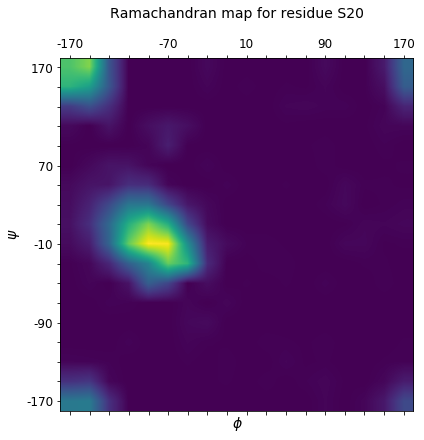

In [12]:
path = 'Ubiq\\predABP.tab' #don't try to read other files :D

get_working_file(path)
distr = maf(open('temp_1.txt', 'r'))
distribution_plotter_plus(distr)